In [8]:
import matplotlib.pyplot as plt
import numpy as np
N = 5
pos = np.zeros((N*N,2))
for i in range(0, N*N):
    ix = i//(N)
    iy = i%(N)
    pos[i] = [1/(N-1) * ix, iy *1/(N-1)]

In [9]:
triangle = np.zeros(((N-1)*(N-1)*2, 3))
for i in range(0, (N-1)*(N-1)*2):
    j = i//2
    jx = j//(N-1)
    jy = j%(N-1)
    k = jx + jy*N
    if i%2 == 1:
        triangle[i] = [k,k+N,k+N+1]
    else:
        triangle[i] = [k,k+1,k+N+1]
    

In [10]:
triangle

array([[ 0.,  1.,  6.],
       [ 0.,  5.,  6.],
       [ 5.,  6., 11.],
       [ 5., 10., 11.],
       [10., 11., 16.],
       [10., 15., 16.],
       [15., 16., 21.],
       [15., 20., 21.],
       [ 1.,  2.,  7.],
       [ 1.,  6.,  7.],
       [ 6.,  7., 12.],
       [ 6., 11., 12.],
       [11., 12., 17.],
       [11., 16., 17.],
       [16., 17., 22.],
       [16., 21., 22.],
       [ 2.,  3.,  8.],
       [ 2.,  7.,  8.],
       [ 7.,  8., 13.],
       [ 7., 12., 13.],
       [12., 13., 18.],
       [12., 17., 18.],
       [17., 18., 23.],
       [17., 22., 23.],
       [ 3.,  4.,  9.],
       [ 3.,  8.,  9.],
       [ 8.,  9., 14.],
       [ 8., 13., 14.],
       [13., 14., 19.],
       [13., 18., 19.],
       [18., 19., 24.],
       [18., 23., 24.]])

<Figure size 360x360 with 0 Axes>

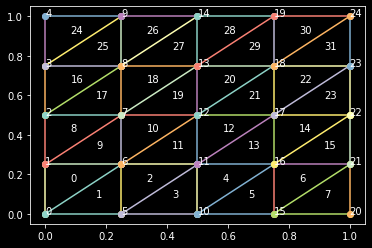

In [11]:
def draw(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],marker='o')
import matplotlib.pyplot as plt
x = np.linspace(0,1,N)
y= np.linspace(0,1,N)
plt.figure(figsize=(5,5))

fig, ax = plt.subplots()

for i in range(0,N*N):
   ax.annotate(i, (pos[i][0], pos[i][1]))
for i in range(0,N):
    for j in range(1,N):
        draw(x[j-1],y[i],x[j],y[i])
        draw(x[i],y[j-1],x[i],y[j])
        if i >=1:
            draw(x[i-1],y[j-1],x[i],y[j])
#plot triangle
for i in range(0,(N-1)**2*2):
    x0,y0= pos[int(triangle[i,0])]
    x1,y1= pos[int(triangle[i,1])]
    x2,y2 = pos[int(triangle[i,2])]
    xmean = (x0 + x1 + x2)/3.0
    ymean= (y0 + y1 + y2)/3.0
    ax.annotate(i, (xmean,ymean))
plt.show()